In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = pd.read_csv('result_0505-194108.csv', header = None, sep = ':')
data.head(10)

,0,1,2,3,4,5
0,cpu_openvino,1,147.96,6.76,vit_b_16,FP16
1,gpu_openvino,1,247.71,4.04,vit_b_16,FP16
2,cpu_openvino,1,79.52,12.58,vgg11,FP16
3,gpu_openvino,1,18.24,54.81,vgg11,FP16
4,cpu_openvino,1,37.36,26.77,resnet50,FP16
5,gpu_openvino,1,17.56,56.94,resnet50,FP16
6,cpu_openvino,2,364.61,5.49,vit_b_16,FP16
7,gpu_openvino,2,275.11,7.27,vit_b_16,FP16
8,cpu_openvino,2,127.32,15.71,vgg11,FP16
9,gpu_openvino,2,79.49,25.16,vgg11,FP16


In [52]:
data.to_csv("result_cleaned.csv", index = False)

In [53]:
data[4].value_counts()

vit_b_16    32
vgg11       32
resnet50    32
Name: 4, dtype: int64

In [54]:
data[0].value_counts()

cpu_openvino    48
gpu_openvino    48
Name: 0, dtype: int64

In [70]:
resnet50_data = data[data[4] == 'resnet50']

In [71]:
precision_data = resnet50_data[resnet50_data[5] == 'FP16']
device_data = precision_data[precision_data[0] == 'gpu_openvino']

In [57]:
p = precision_data[precision_data[0] == 'cpu_openvino'][1]
p.head(10)

0      1
6      2
12     4
18     6
24    10
30    20
36    30
42    50
Name: 1, dtype: int64

In [58]:
device_data.head(10)

,0,1,2,3,4,5
1,gpu_openvino,1,247.71,4.04,vit_b_16,FP16
7,gpu_openvino,2,275.11,7.27,vit_b_16,FP16
13,gpu_openvino,4,334.10,11.97,vit_b_16,FP16
19,gpu_openvino,6,395.94,15.15,vit_b_16,FP16
25,gpu_openvino,10,725.98,13.77,vit_b_16,FP16
31,gpu_openvino,20,1360.87,14.70,vit_b_16,FP16
37,gpu_openvino,30,1791.91,16.74,vit_b_16,FP16
43,gpu_openvino,50,3158.62,15.83,vit_b_16,FP16


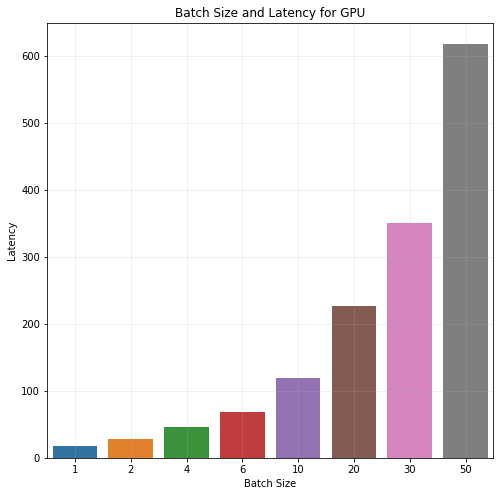

In [72]:
plt.figure(figsize = (8,8))
sns.barplot(x = precision_data[precision_data[0] == 'gpu_openvino'][1], y = precision_data[precision_data[0] == 'gpu_openvino'][2])
plt.title("Batch Size and Latency for GPU")
plt.grid(alpha = 0.25)
plt.xlabel("Batch Size")
plt.ylabel("Latency")
plt.savefig("batch_size_latency_gpu.svg")
plt.show()

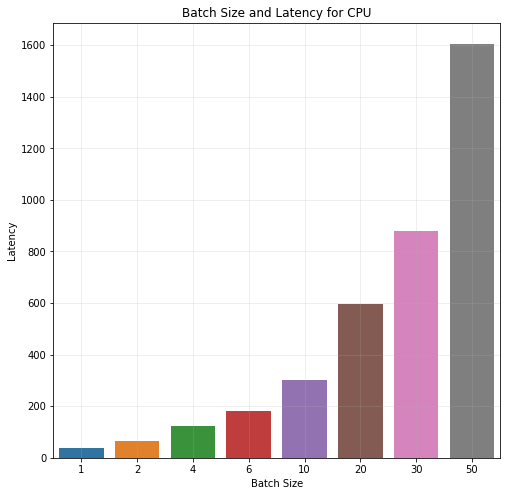

In [73]:
plt.figure(figsize = (8,8))
sns.barplot(x = precision_data[precision_data[0] == 'cpu_openvino'][1], y = precision_data[precision_data[0] == 'cpu_openvino'][2])
plt.title("Batch Size and Latency for CPU")
plt.grid(alpha = 0.25)
plt.xlabel("Batch Size")
plt.ylabel("Latency")
plt.savefig("batch_size_latency_cpu.svg")
plt.show()

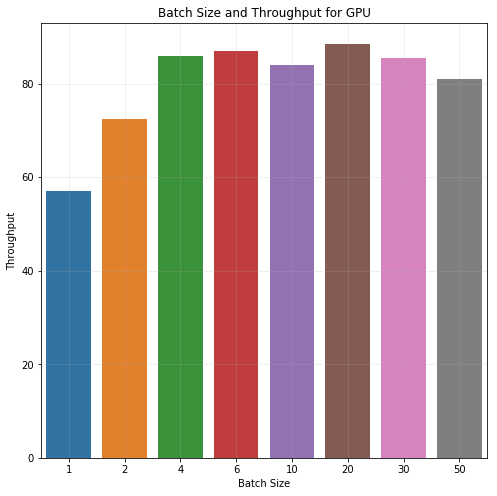

In [74]:
plt.figure(figsize=(8,8))
sns.barplot(x = precision_data[precision_data[0] == 'gpu_openvino'][1], y = precision_data[precision_data[0] == 'gpu_openvino'][3])
plt.title("Batch Size and Throughput for GPU")
plt.grid(alpha = 0.25)
plt.xlabel("Batch Size")
plt.ylabel("Throughput")
plt.savefig("batch_size_throughput_gpu.svg")
plt.show()

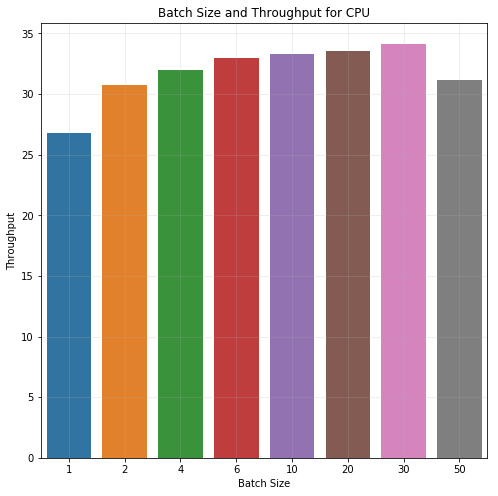

In [75]:
plt.figure(figsize=(8,8))
sns.barplot(x = precision_data[precision_data[0] == 'cpu_openvino'][1], y = precision_data[precision_data[0] == 'cpu_openvino'][3])
plt.title("Batch Size and Throughput for CPU")
plt.grid(alpha = 0.25)
plt.xlabel("Batch Size")
plt.ylabel("Throughput")
plt.savefig("batch_size_throughput_cpu.svg")
plt.show()